# take some time to download ERA5 radiation data
ref. https://docs.dkrz.de/doc/dataservices/finding_and_accessing_data/era_data/index.html#era5-param

In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

import xarray as xr

import intake

import sys
sys.path.append("COARE-algorithm/Python/COARE3.5/")  ## importing original meteo and coare35nv modules

# - setting gobal variables once for all
g = 9.81     # m/s2
Lv = 2.5e3   # J/g 
cp = 1.004   # J/g

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
BCO_lon = -59.4288
BCO_lat = 13.1627

print(f"at BCO latitude, 200km correspond to approximately {(180/np.pi)*(200000/(6370000*np.cos(BCO_lat*np.pi/180))):.2f} degrees longitude")

# - set control volume edges
vol_lon = [BCO_lon-0.5+360 , BCO_lon+1.3+360]  #[-60+360, -58+360]
vol_lat = [BCO_lat-0.5     , BCO_lat+1.3]  #[12.5, 14.5]

at BCO latitude, 200km correspond to approximately 1.85 degrees longitude


In [4]:
## - thanks Lukas
cat = intake.open_catalog("https://gitlab.dkrz.de/data-infrastructure-services/era5-kerchunks/-/raw/main/main.yaml")
ds = cat["surface_analysis_daily"].to_dask()

ds




/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 5TB
Dimensions:  (time: 30955, cell: 542080)
Coordinates:
  * time     (time) datetime64[ns] 248kB 1940-01-01T11:30:00 ... 2024-09-30T1...
    lat      (cell) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    lon      (cell) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables: (12/40)
    100u     (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    100v     (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    10u      (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    10v      (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    2d       (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    2t       (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    ...       ...
    swvl4    (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    tcc      (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    tco3     (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    tcw      (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    tcwv     (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
    tsn      (time, cell) float64 134GB dask.array<chunksize=(30, 542080), meta=np.ndarray>
Attributes: (12/22)
    project:              ECMWF Re-Analysis
    project_id:           ERA
    institution_id:       ECMWF-DKRZ
    institution:          Data from European Centre for Medium-Range Weather ...
    source_id:            IFS
    source:               ECMWF Integrated Forecast System (IFS) CY41R2
    ...                   ...
    format:               kerchunk
    product:              reanalysis
    responsible_persons:  Angelika Heil, Fabian Wachsmann
    title:                The DKRZ ERA5 data pool. Generated using Copernicus...
    license:              The ERA5 data are published with the Copernicus Pro...
    references:           Hersbach, H., Bell, B., Berrisford, P., Hirahara, S...

In [ ]:
var_list = ["2t", "2d", "sst", "10u", "10v"]
time = slice("2020", "2025")

ds = ds[var_list].sel(time=slice("2020-01-01", "2024-10-01"))  # [var_list]

mask = ((ds.lon >= vol_lon[0]) & (ds.lon <= vol_lon[1]) &
        (ds.lat >= vol_lat[0]) & (ds.lat <= vol_lat[1])).compute()

cell_indices = np.where(mask)[0]
ds = ds.isel(cell=cell_indices)

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 1735, cell: 42)
Coordinates:
  * time     (time) datetime64[ns] 14kB 2020-01-01T11:30:00 ... 2024-09-30T11...
    lat      (cell) float64 336B dask.array<chunksize=(42,), meta=np.ndarray>
    lon      (cell) float64 336B dask.array<chunksize=(42,), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables:
    2t       (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    2d       (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    sst      (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    10u      (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    10v      (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
Attributes: (12/22)
    project:              ECMWF Re-Analysis
    project_id:           ERA
    institution_id:       ECMWF-DKRZ
    institution:          Data from European Centre for Medium-Range Weather ...
    source_id:            IFS
    source:               ECMWF Integrated Forecast System (IFS) CY41R2
    ...                   ...
    format:               kerchunk
    product:              reanalysis
    responsible_persons:  Angelika Heil, Fabian Wachsmann
    title:                The DKRZ ERA5 data pool. Generated using Copernicus...
    license:              The ERA5 data are published with the Copernicus Pro...
    references:           Hersbach, H., Bell, B., Berrisford, P., Hirahara, S...

#### to do:
- compute rh with 2d
- find downwelling shortwave and longwave radiation (use BCO)
- put everything in COARE

In [ ]:
#### RH computation

from meteo import qsat

cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")
# --- SURFACE WEATHER STATION

wxt = cat.BCO.surfacemet_wxt_v1.to_dask()
wxt = wxt.sel(time=slice("2020-01-01", "2024-09-30"))
sfc_pressure = wxt['P'].resample(time='1d').mean().fillna(1013).reindex(time=ds["2d"].time, method='nearest')
sfc_pressure_xr = sfc_pressure.expand_dims(cell=ds["2d"].sizes['cell']).broadcast_like(ds["2d"])

# compute RH at 2m
e  = qsat(ds["2d"].values-273.15, sfc_pressure_xr.values)
es = qsat(ds["2t"].values-273.15, sfc_pressure_xr.values)
rh2 = e/es

/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [5]:
## add rh2 to dataset for the Barbados control volume
import xarray as xr

ds["rh2"] = xr.DataArray(
    rh2,
    dims=["time", "cell"],
    coords={"time": ds["2d"].time, "cell": ds["2d"].cell},
    attrs={"long_name": "relative humidity at 2m", "units": "dimensionless, [0-1]"}
).chunk(ds["2d"].chunks)



sfc_pressure_xr.attrs.update({
    "description": "daily average surface pressure from BCO",
    "units": "hPa"
})

ds["sfc_pres"] = sfc_pressure_xr.chunk(ds["2d"].chunks)

/tmp/ipykernel_2384784/624035640.py:9: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  ).chunk(ds["2d"].chunks)
/tmp/ipykernel_2384784/624035640.py:18: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  ds["sfc_pres"] = sfc_pressure_xr.chunk(ds["2d"].chunks)


In [58]:
## get radiation from BCO pyranometers
cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")

ds_rad = cat.BCO.radiation_c2_v1.to_dask()
ds_rad = ds_rad.sel(time=slice("2020-01-01", "2024-09-30"))
ds_rad

/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 10GB
Dimensions:       (time: 134616749)
Coordinates:
  * time          (time) datetime64[ns] 1GB 2020-01-12T03:06:03 ... 2024-09-3...
    alt           float64 8B ...
    lat           float64 8B ...
    lon           float64 8B ...
Data variables: (12/16)
    LWD_diff      (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    LWD_diff_S    (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    LWD_diff_T    (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    LWD_diff_V    (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_diff      (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_diff_S    (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    ...            ...
    SWD_dir_T     (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_dir_V     (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_global    (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_global_S  (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_global_T  (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
    SWD_global_V  (time) float32 538MB dask.array<chunksize=(51162,), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.12
    bcoproc_version:  0.0.0.post757.dev0+89732e6
    featureType:      timeSeries
    institution:      Max Planck Institute for Meteorology, Hamburg
    license:          CC0-1.0
    location:         The Barbados Cloud Observatory, Deebles Point, Barbados...
    platform:         BCO
    source:           Kipp & Zonen CMP21 (shaded and un-shaded) pyranometer, ...
    summary:          This dataset contains measurements of downwelling short...
    title:            Radiation data from BCO (Level 1)
    tool_versions:    {"Python": "3.11.2 (main, Apr 28 2025, 14:11:48) [GCC 1...

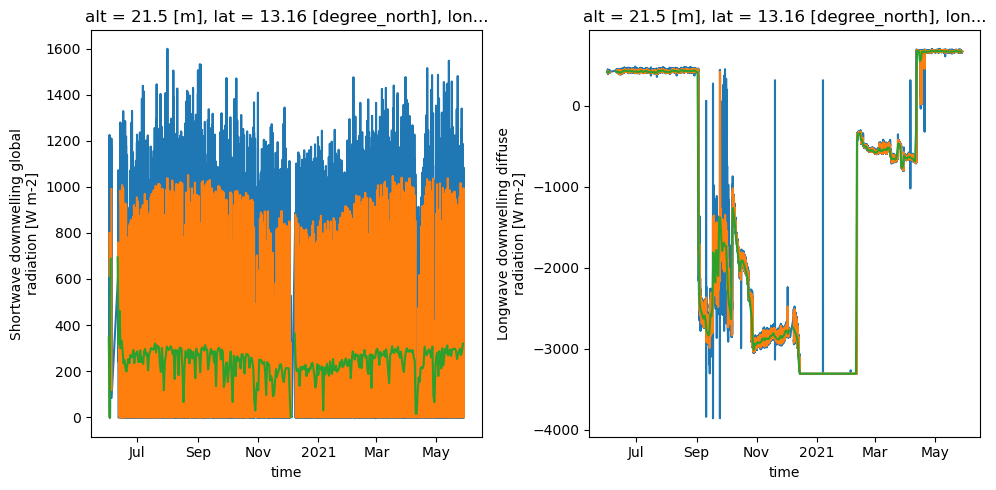

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

when_here = slice("2020-06-01", "2021-05-28")

ds_rad["SWD_global"].sel(time=when_here).plot(ax=ax[0])
ds_rad["SWD_global"].sel(time=when_here).resample(time="1h").mean().plot(ax=ax[0])
ds_rad["SWD_global"].sel(time=when_here).resample(time="1d").mean().plot(ax=ax[0])

ds_rad["LWD_diff"].sel(time=when_here).plot(ax=ax[1])
ds_rad["LWD_diff"].sel(time=when_here).resample(time="1h").mean().plot(ax=ax[1])
ds_rad["LWD_diff"].sel(time=when_here).resample(time="1d").mean().plot(ax=ax[1])


plt.tight_layout()


In [8]:
sw = ds_rad['SWD_global'].resample(time='1d').mean().fillna(250).reindex(time=ds["2d"].time, method='nearest')
lw = ds_rad["LWD_diff"].resample(time="1d").mean().fillna(415).reindex(time=ds["2d"].time, method='nearest')

sw_xr = sw.expand_dims(cell=ds["2d"].sizes['cell']).broadcast_like(ds["2d"])
lw_xr = lw.expand_dims(cell=ds["2d"].sizes['cell']).broadcast_like(ds["2d"])

In [ ]:
sw_xr.attrs.update({
    "description": "daily average total SW from BCO",
    "units": "W/m2"
})

lw_xr.attrs.update({
    "description": "daily average diffuse LW from BCO",
    "units": "W/m2"
})

ds["sw_global"] = sw_xr.chunk(ds["2d"].chunks)
ds["lw_diff"]   = lw_xr.chunk(ds["2d"].chunks)

/tmp/ipykernel_2384784/3351309689.py:11: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  ds["sw_global"] = sw_xr.chunk(ds["2d"].chunks)
/tmp/ipykernel_2384784/3351309689.py:12: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  ds["lw_diff"]   = lw_xr.chunk(ds["2d"].chunks)


In [15]:
ds.lon.attrs.update({
    "filter_by_keys": ""
})

ds.lat.attrs.update({
    "filter_by_keys": ""
})

ds

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 1735, cell: 42)
Coordinates:
  * time       (time) datetime64[ns] 14kB 2020-01-01T11:30:00 ... 2024-09-30T...
  * cell       (cell) int64 336B 0 1 2 3 4 5 6 7 8 ... 34 35 36 37 38 39 40 41
    lat        (cell) float64 336B dask.array<chunksize=(42,), meta=np.ndarray>
    lon        (cell) float64 336B dask.array<chunksize=(42,), meta=np.ndarray>
    alt        float64 8B ...
Data variables:
    2t         (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    2d         (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    sst        (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    10u        (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    10v        (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    rh2        (time, cell) float64 583kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    sfc_pres   (time, cell) float32 291kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    sw_global  (time, cell) float32 291kB dask.array<chunksize=(30, 42), meta=np.ndarray>
    lw_diff    (time, cell) float32 291kB dask.array<chunksize=(30, 42), meta=np.ndarray>
Attributes: (12/22)
    project:              ECMWF Re-Analysis
    project_id:           ERA
    institution_id:       ECMWF-DKRZ
    institution:          Data from European Centre for Medium-Range Weather ...
    source_id:            IFS
    source:               ECMWF Integrated Forecast System (IFS) CY41R2
    ...                   ...
    format:               kerchunk
    product:              reanalysis
    responsible_persons:  Angelika Heil, Fabian Wachsmann
    title:                The DKRZ ERA5 data pool. Generated using Copernicus...
    license:              The ERA5 data are published with the Copernicus Pro...
    references:           Hersbach, H., Bell, B., Berrisford, P., Hirahara, S...

In [17]:
encoding = {}

for var in ds.data_vars:
    if ds[var].chunks:
        encoding[var] = {
            "chunksizes": [c[0] for c in ds[var].chunks]
        }

ds.to_netcdf(
    "fluxes_data/ingredients_fluxes_ERA5_BCO.nc",
    engine="netcdf4",
    mode="w",
    encoding=encoding
)



## data saved in fluxes_data/ingredients_fluxes_ERA5_BCO.nc

#### compute first estimates of LHF and SHF with COARE

In [3]:
import coare35vn

ds_ingredients = xr.open_dataset("fluxes_data/ingredients_fluxes_ERA5_BCO.nc")

In [4]:
ds

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 1735, cell: 42)
Coordinates:
  * time       (time) datetime64[ns] 14kB 2020-01-01T11:30:00 ... 2024-09-30T...
  * cell       (cell) int64 336B 0 1 2 3 4 5 6 7 8 ... 34 35 36 37 38 39 40 41
    lat        (cell) float64 336B ...
    lon        (cell) float64 336B ...
    alt        float64 8B ...
Data variables:
    2t         (time, cell) float64 583kB ...
    2d         (time, cell) float64 583kB ...
    sst        (time, cell) float64 583kB ...
    10u        (time, cell) float64 583kB ...
    10v        (time, cell) float64 583kB ...
    rh2        (time, cell) float64 583kB ...
    sfc_pres   (time, cell) float32 291kB ...
    sw_global  (time, cell) float32 291kB ...
    lw_diff    (time, cell) float32 291kB ...
Attributes: (12/22)
    project:              ECMWF Re-Analysis
    project_id:           ERA
    institution_id:       ECMWF-DKRZ
    institution:          Data from European Centre for Medium-Range Weather ...
    source_id:            IFS
    source:               ECMWF Integrated Forecast System (IFS) CY41R2
    ...                   ...
    format:               kerchunk
    product:              reanalysis
    responsible_persons:  Angelika Heil, Fabian Wachsmann
    title:                The DKRZ ERA5 data pool. Generated using Copernicus...
    license:              The ERA5 data are published with the Copernicus Pro...
    references:           Hersbach, H., Bell, B., Berrisford, P., Hirahara, S...

In [5]:
u10, v10 = ds["10u"], ds["10v"]
u = (u10**2 + v10**2)**0.5

#### compare wind speed variability between ERA5 and BCO

In [6]:
cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/catalog.yaml")
wxt = cat.BCO.surfacemet_wxt_v1.to_dask().sel(time=slice(u.time[0].values, u.time[-1].values))

vel = wxt['VEL'].resample(time="1d").mean()

/work/mh1498/m301248/conda/envs/env_hacka/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


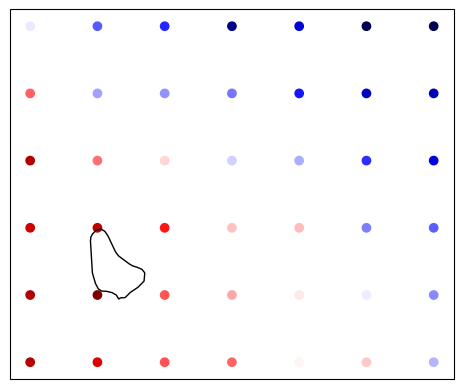

In [28]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.scatter(ds.lon, ds.lat, c=u.sel(time='2020-02-01'), transform=ccrs.Geodetic(), cmap="seismic")
ax.coastlines()

In [7]:
cells = np.ones((3,2))
for i in range(cells.shape[0]):
    cells[i,:] = np.arange(16,18)+7*i
u_mean = u.sel(cell=cells.flatten()).mean(dim="cell")

Text(0.5, 0, '$m~s^{-1}$')

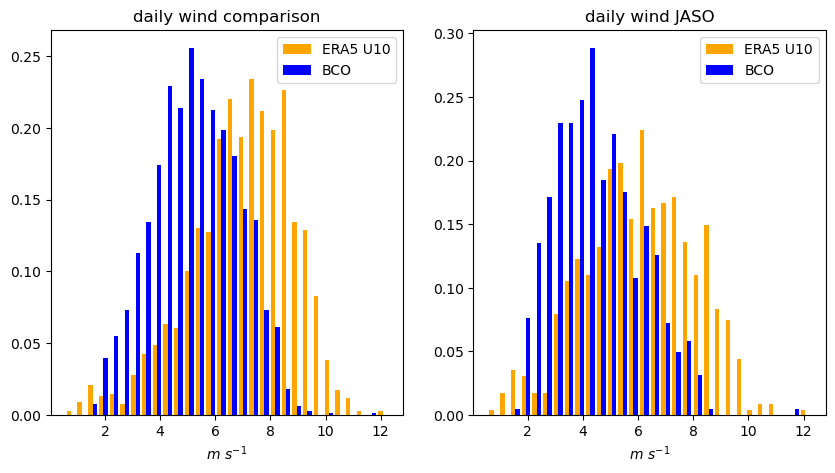

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist( [u_mean.values, vel.values.flatten()],\
            bins=30, histtype='bar',\
            color=['orange', 'blue'],
            density=True, 
            label=['ERA5 U10', 'BCO'])
ax[0].set_title("daily wind comparison")
ax[0].legend()
ax[0].set_xlabel(r'$m~s^{-1}$')


x = u_mean.sel(time=u_mean['time.month'].isin([7, 8, 9, 10]))
y = vel.sel(time=vel['time.month'].isin([7, 8, 9, 10]))

ax[1].hist( [x.values.flatten(), y.values.flatten()],\
            bins=30, histtype='bar',\
            color=['orange', 'blue'],
            density=True, 
            label=['ERA5 U10', 'BCO'])
ax[1].set_title("daily wind JASO")
ax[1].legend()
ax[1].set_xlabel(r'$m~s^{-1}$')

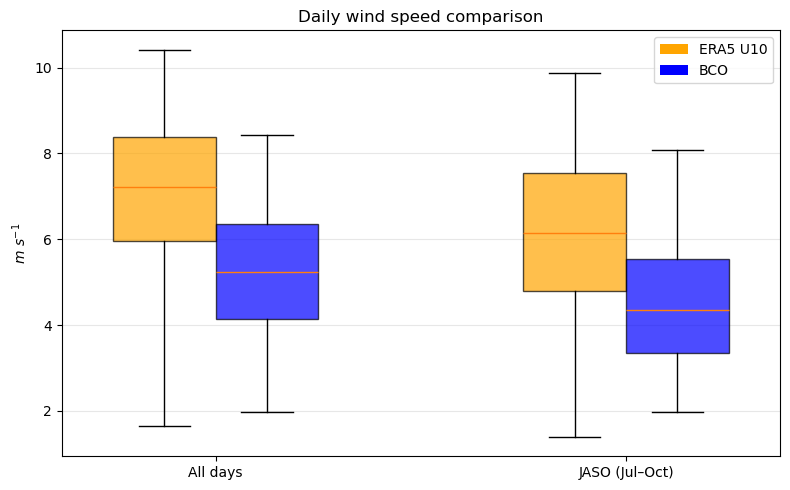

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

# --- Data ---
data_all = [
    u_mean.values.flatten(),
    vel.dropna(dim='time', how='all').values.flatten()
]

x = u_mean.sel(time=u_mean['time.month'].isin([7, 8, 9, 10]))
y = vel.sel(time=vel['time.month'].isin([7, 8, 9, 10])).dropna(dim='time', how='all')

data_jaso = [
    x.values.flatten(),
    y.values.flatten()
]

# --- Combine for plotting ---
data = data_all + data_jaso

positions = [1, 1.5, 3, 3.5]

box = ax.boxplot(
    data,
    positions=positions,
    widths=0.5,
    whis=(1, 99),
    showfliers=False,
    patch_artist=True
)

colors = ['orange', 'blue', 'orange', 'blue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)


# --- Labels & formatting ---
ax.set_xticks([1.25, 3.25])
ax.set_xticklabels(['All days', 'JASO (Jul–Oct)'])

ax.set_ylabel(r'$m~s^{-1}$')
ax.set_title('Daily wind speed comparison')

# Legend (manual)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', label='ERA5 U10'),
    Patch(facecolor='blue', label='BCO')
]
ax.legend(handles=legend_elements)

ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


#### do the same for moisture

In [10]:
import functions_collector
q_era = functions_collector.mr_from_rh(ds["2t"],ds["sfc_pres"],ds["rh2"])
q_sat_era = functions_collector.mr_from_rh(ds["sst"],ds["sfc_pres"],rh=1.)

temp = wxt['T'].dropna(dim="time", how="all")+273.15    ## deg K
rh   = wxt['RH'].dropna(dim="time", how="all")/100.     ## fraction 0-1
sfc_pressure = wxt['P'].dropna(dim="time", how="all") 
q_bco = functions_collector.mr_from_rh(temp,sfc_pressure,rh=rh)
q_bco = q_bco.resample(time="1d").mean()

In [11]:
q_bco.max().values

array(0.01963592, dtype=float32)

In [12]:
## compute q_sat_bco averaging SST in some neighbouring cells
cells = np.ones((3,2))
for i in range(cells.shape[0]):
    cells[i,:] = np.arange(16,18)+7*i
sst_bco = ds["sst"].sel(cell=cells.flatten()).mean(dim="cell")
pr = ds["sfc_pres"].sel(cell=cells.flatten()).mean(dim="cell")
q_sat_bco = functions_collector.mr_from_rh(sst_bco, pr, rh=1.)
q_bco = q_bco.assign_coords(time=q_sat_bco.time)

In [13]:
cells = np.ones((3,2))
for i in range(cells.shape[0]):
    cells[i,:] = np.arange(16,18)+7*i
q_era = q_era.sel(cell=cells.flatten()).mean(dim="cell")
q_sat_era = q_sat_era.sel(cell=cells.flatten()).mean(dim="cell")

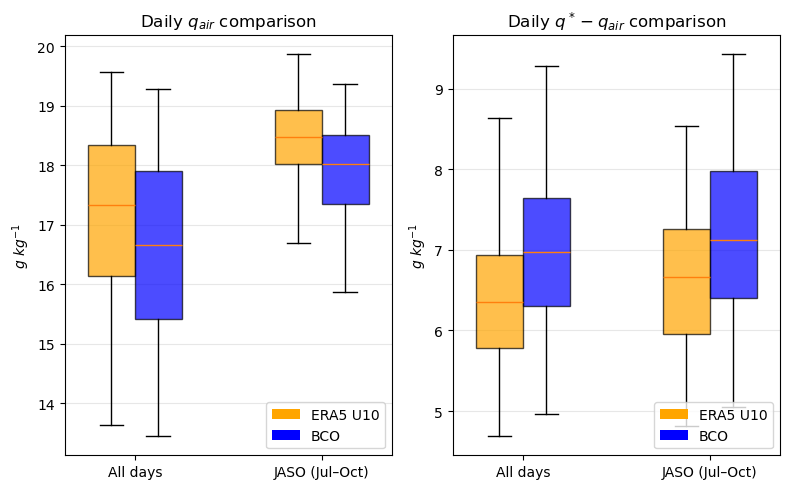

In [81]:
fig, ax = plt.subplots(1,2, figsize=(8, 5))

# --- Data ---
data_all = [
    q_era.values.flatten()*1e3,
    q_bco.dropna(dim='time', how='all').values.flatten()*1e3
]

x = q_era.sel(time=q_era['time.month'].isin([7, 8, 9, 10]))*1e3
y = q_bco.sel(time=q_bco['time.month'].isin([7, 8, 9, 10])).dropna(dim='time', how='all')*1e3

data_jaso = [
    x.values.flatten(),
    y.values.flatten()
]

# --- Combine for plotting ---
data = data_all + data_jaso

positions = [1, 1.5, 3, 3.5]

box = ax[0].boxplot(
    data,
    positions=positions,
    widths=0.5,
    whis=(1, 99),
    showfliers=False,
    patch_artist=True
)

colors = ['orange', 'blue', 'orange', 'blue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)


# --- Labels & formatting ---
ax[0].set_xticks([1.25, 3.25])
ax[0].set_xticklabels(['All days', 'JASO (Jul–Oct)'])

ax[0].set_ylabel(r'$g~kg^{-1}$')
ax[0].set_title(r'Daily $q_{air}$ comparison')

# Legend (manual)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', label='ERA5 U10'),
    Patch(facecolor='blue', label='BCO')
]
ax[0].legend(handles=legend_elements)

ax[0].grid(axis='y', alpha=0.3)





## --- variability of q_sat - q2 / q_bco
data_all = [
    (q_sat_era-q_era).values.flatten()*1e3,
    (q_sat_bco-q_bco).dropna(dim='time', how='all').values.flatten()*1e3
]

x = (q_sat_era-q_era).sel(time=q_era['time.month'].isin([7, 8, 9, 10]))*1e3
y = (q_sat_bco-q_bco).sel(time=q_bco['time.month'].isin([7, 8, 9, 10])).dropna(dim='time', how='all')*1e3

data_jaso = [
    x.values.flatten(),
    y.values.flatten()
]

# --- Combine for plotting ---
data = data_all + data_jaso

positions = [1, 1.5, 3, 3.5]

box = ax[1].boxplot(
    data,
    positions=positions,
    widths=0.5,
    whis=(1, 99),
    showfliers=False,
    patch_artist=True
)

colors = ['orange', 'blue', 'orange', 'blue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)


# --- Labels & formatting ---
ax[1].set_xticks([1.25, 3.25])
ax[1].set_xticklabels(['All days', 'JASO (Jul–Oct)'])

ax[1].set_ylabel(r'$g~kg^{-1}$')
ax[1].set_title(r'Daily $q^* - q_{air}$ comparison')

# Legend (manual)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', label='ERA5 U10'),
    Patch(facecolor='blue', label='BCO')
]
ax[1].legend(handles=legend_elements, loc="lower right")

ax[1].grid(axis='y', alpha=0.3)




plt.tight_layout()
plt.show()


#### computation of surface fluxes from ERA5 large scale fields

In [50]:
## subselect some data for quick look
time_window = ds_ingredients.time # slice("2020-02-01","2020-02-28")
u10, v10 = ds_ingredients["10u"].sel(time=time_window), ds_ingredients["10v"].sel(time=time_window)
u = (u10**2 + v10**2)**0.5
t = ds_ingredients["2t"].sel(time=time_window)
rh = ds_ingredients["rh2"].sel(time=time_window)
ts = ds_ingredients["sst"].sel(time=time_window)
P = ds_ingredients["sfc_pres"].sel(time=time_window)
Rs = ds_ingredients["sw_global"].sel(time=time_window)
Rl = ds_ingredients["lw_diff"].sel(time=time_window)

output = coare35vn.coare35vn(u=u.values.flatten(),
                             t=t.values.flatten()-273.15,
                             rh=100*rh.values.flatten(),
                             ts=ts.values.flatten()-273.15,
                             P=P.values.flatten(),
                             Rs=Rs.values.flatten(),
                             Rl=Rl.values.flatten(), 
                             zu=10, zt=2, zq=2, lat=13, zi=600, rain=None, cp=None, sigH=None, jcool=1)


## output
# list1 = [usr,tau,hsb,hlb,hbb,hlwebb,tsr,qsr,zot,zoq,Cd,Ch,Ce,L,zet, dter,dqer,tkt,RF,Cdn_10,Chn_10,Cen_10]
        #    usr,tau,hsb,hlb,hbb,hlwebb,tsr,qsr,zot,zoq,Cd,Ch,Ce,L,zet, dter,dqer,tkt,RF,Cdn_10,Chn_10,Cen_10
# 0      usr     friction velocity that includes gustiness (m/s)


#     1      tau     wind stress (N/m^2)


#     2      hsb     sensible heat flux into ocean (W/m^2)


#     3      hlb     latent heat flux into ocean (W/m^2)


#     4      hbb     buoyancy flux into ocean (W/m^2)

#     6      hlwebb  Webb correction for latent heat flux, add this to directly

#     7      tsr     temperature scaling parameter (K)


#     8      qsr     specific humidity scaling parameter (g/Kg)


#     9      zot     thermal roughness length (m)


#     10     zoq     moisture roughness length (m)


    # 11     Cd      wind stress transfer (drag) coefficient at height zu


    # 12     Ch      sensible heat transfer coefficient (Stanton number) at ht zu


    # 13     Ce      latent heat transfer coefficient (Dalton number) at ht zq


    # 14     L       Obukhov length scale (m)


    # 15     zet     Monin-Obukhov stability parameter zu/L


    # 16     dter    cool-skin temperature depression (degC)


    # 17     dqer    cool-skin humidity depression (degC)


    # 18     tkt     cool-skin thickness (m)

    # 33     RF      rain heat flux (W/m2)

    # 30     Cdn_10  neutral value of drag coefficient at 10m


    # 31     Chn_10  neutral value of Stanton number at 10m


    # 32     Cen_10  neutral value of Dalton number at 10m




/work/mh1498/m301248/TCO_data/COARE-algorithm/Python/COARE3.5/meteo.py:156: RuntimeWarning: invalid value encountered in power
  psi = -((1 + 0.6667*zet)**1.5 + 0.6667*(zet - 14.28)*exp(-dzet) + 8.525)


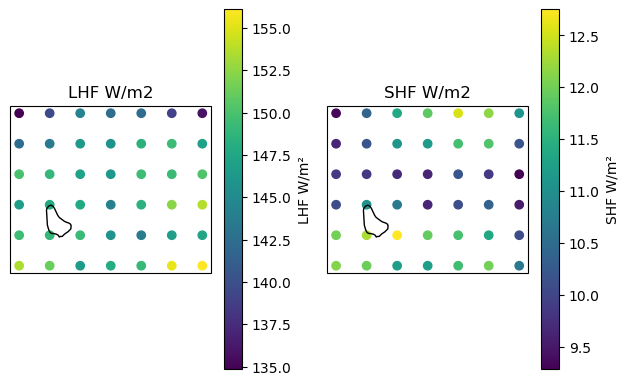

In [12]:
fig, ax = plt.subplots(1,2, subplot_kw=dict(projection=ccrs.PlateCarree()))

sc = ax[0].scatter(ds.lon, ds.lat, c=lhf[0], transform=ccrs.Geodetic(), cmap="viridis")
ax[0].coastlines()
ax[0].set_title("LHF W/m2")
cbar = fig.colorbar(sc, ax=ax[0], orientation="vertical", shrink=0.8)
cbar.set_label("LHF W/m²")

sc = ax[1].scatter(ds.lon, ds.lat, c=shf[0], transform=ccrs.Geodetic(), cmap="viridis")
ax[1].coastlines()
ax[1].set_title("SHF W/m2")
cbar = fig.colorbar(sc, ax=ax[1], orientation="vertical", shrink=0.8)
cbar.set_label("SHF W/m²")



plt.tight_layout()

In [51]:
sfc_fluxes = xr.Dataset()

variables = {"names":["usr","tau","shf","lhf","hbb","hlwebb","tsr","qsr","zot","zoq","Cd","Ch","Ce",
                      "L","zet", "dter","dqer","tkt","RF","Cdn_10","Chn_10","Cen_10", "cqhf", "dq_wetc", "wetc*dter*jcool", "wetc"],
             


             "description": ["friction velocity that includes gustiness", 
                             "wind stress", 
                             "sensible heat flux into ocean",
                            "latent heat flux into ocean" ,
                            "buoyancy flux into ocean",
                            "Webb correction for latent heat flux, add this to directly",
                            "temperature scaling parameter",
                            "specific humidity scaling parameter",
                             "thermal roughness length", 
                            "moisture roughness length",
                            "wind stress transfer (drag) coefficient at height zu",
                            "sensible heat transfer coefficient (Stanton number) at ht zu",
                            "latent heat transfer coefficient (Dalton number) at ht zq",
                            "Obukhov length scale",
                            "Monin-Obukhov stability parameter zu/L",
                            "cool-skin temperature depression",
                            "cool-skin humidity depression",
                            "cool-skin thickness",
                            "rain heat flux ",
                            "neutral value of drag coefficient at 10m",
                            "neutral value of Stanton number at 10m",
                            "neutral value of Dalton number at 10m", 
                            "moisture exchange coeff", 
                            "dq - wetc*dter*jcool", 
                            "wetc*dter*jcool",
                            "wetc_only" ,
                            "dter only"], 
                 "units": [ "m/s",
                            "N/m^2",
                            "W/m^2",
                            "W/m^2",
                            "W/m^2",
                            "correction",
                            "K",
                            "g/Kg",
                            "m",
                            "m",
                            "coefficient",
                            "number",
                            "number",
                            "m",
                            "parameter",
                            "degC",
                            "degC",
                            "m",
                            "W/m2",
                            "coefficient",
                            "number",
                            "number", 
                            "number", 
                            "number", 
                            "number", 
                            "number",]
                            
            }

for j in range(output.shape[1]):
    var = output[:,j]
    var = var.reshape(1735, 42)

    da = xr.DataArray(
        var,
        dims=("time", "cell"),
        coords={
            "time": ds_ingredients.time.values,
            "cell": np.arange(42),
            "lat": ("cell", ds_ingredients.lat.values),
            "lon": ("cell", ds_ingredients.lon.values),
        },
        attrs={
        "units": variables["units"][j],
        "description": variables["description"][j]
        },

        name=variables["names"][j]
                )
    
    sfc_fluxes[variables["names"][j]] = da
    

In [38]:
sfc_fluxes.to_netcdf("fluxes_data/sfc_fluxes_volume_results_2020_2024.nc")

### Analyze variability of data

In [ ]:
sfc_fluxes = xr.open_dataset("fluxes_data/sfc_fluxes_volume_results_2020_2024.nc")

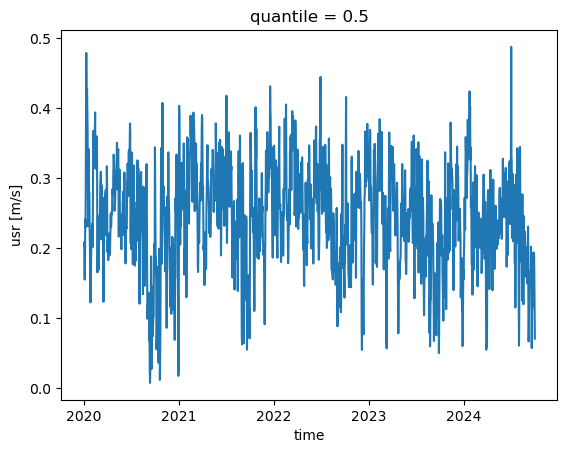

In [52]:
sfc_fluxes["usr"].quantile(0.5, dim="cell").plot.line(x="time")

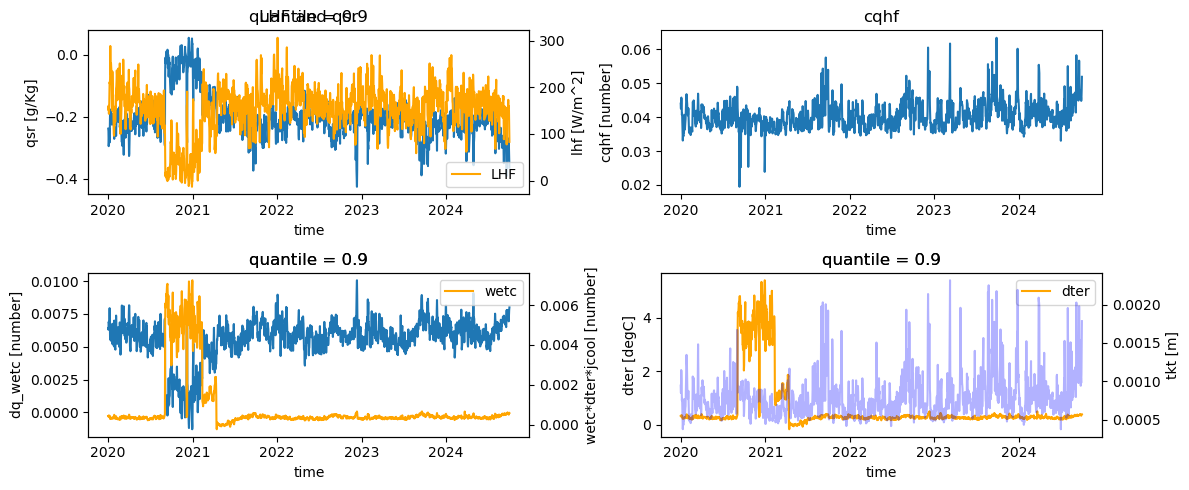

In [55]:
fig, ax = plt.subplots(2,2, figsize=(12,5))
ax = ax.flatten()


sfc_fluxes["qsr"].quantile(0.9, dim="cell").plot.line(ax=ax[0], x="time")
ax[0].set_title("")
ax1 = ax[0].twinx()
sfc_fluxes["lhf"].quantile(0.9, dim="cell").plot.line(ax=ax1, x="time", color="orange", label="LHF")
ax1.legend()

ax[0].set_title("LHF and qsr")



(sfc_fluxes["cqhf"]).quantile(0.9, dim="cell").plot.line(ax=ax[1], x="time")
ax[1].set_title("cqhf")


ax1 = ax[2].twinx()
(sfc_fluxes["dq_wetc"]).quantile(0.9, dim="cell").plot.line(ax=ax[2], x="time")
(sfc_fluxes["wetc*dter*jcool"]).quantile(0.9, dim="cell").plot.line(ax=ax1, x="time", color="orange", label="wetc")
ax1.legend()



(sfc_fluxes["dter"]).quantile(0.9, dim="cell").plot(ax=ax[3], x="time", color="orange", label="dter")
ax[3].legend()
ax3 = ax[3].twinx()
(sfc_fluxes["tkt"]).quantile(0.9, dim="cell").plot(ax=ax3, x="time", color="blue", label="tkt", alpha=0.3)




# (sfc_fluxes["Qs"]*1e3 - sfc_fluxes["Q"]).quantile(0.9, dim="cell").plot.line(ax=ax[3], x="time")
# ax[3].set_title("Qs - Q")

plt.tight_layout()

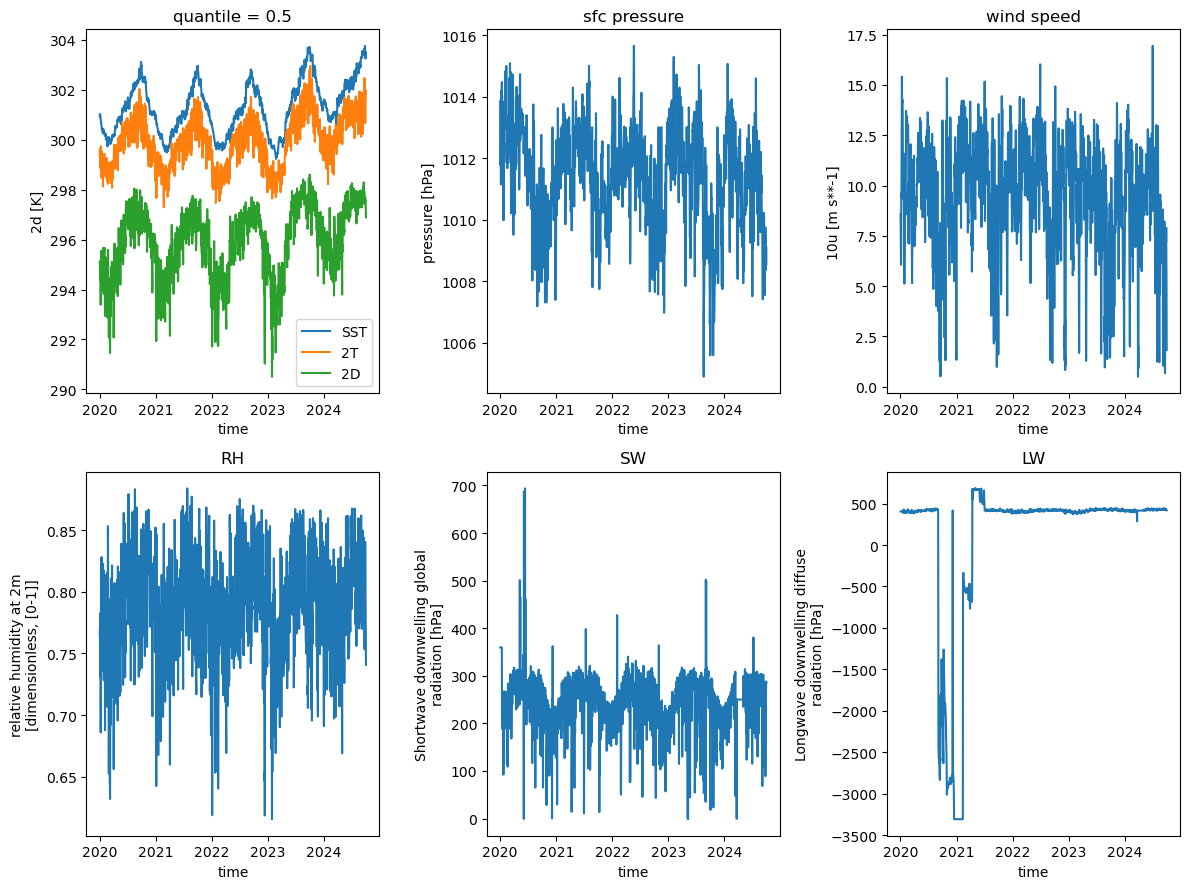

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(12,9))
ax=ax.flatten()

ds_ingredients["sst"].quantile(0.5, dim="cell").plot.line(ax=ax[0], x="time", label= "SST")
ds_ingredients["2t"].quantile(0.5, dim="cell").plot.line(ax=ax[0], x="time", label= "2T")
ds_ingredients["2d"].quantile(0.5, dim="cell").plot.line(ax=ax[0], x="time", label= "2D")
ax[0].legend()

ds_ingredients["sfc_pres"].quantile(0.5, dim="cell").plot.line(ax=ax[1], x="time", label= "sfc P")
ax[1].set_title("sfc pressure")


((ds_ingredients["10u"]**2 + ds_ingredients["10u"]**2 )**(0.5)).quantile(0.5, dim="cell").plot.line(ax=ax[2], x="time", label= r"U^2")
ax[2].set_title("wind speed")


(ds_ingredients["rh2"]).quantile(0.5, dim="cell").plot.line(ax=ax[3], x="time", label= r"RH")
ax[3].set_title("RH")


(ds_ingredients["sw_global"]).quantile(0.5, dim="cell").plot.line(ax=ax[4], x="time", label= r"RH")
ax[4].set_title("SW")

(ds_ingredients["lw_diff"]).quantile(0.5, dim="cell").plot.line(ax=ax[5], x="time", label= r"RH")
ax[5].set_title("LW")



plt.tight_layout()